In [1]:
import pandas as pd

train_set_url = "/content/drive/MyDrive/dataset/KDDTrain_processed.csv"
test_set_url = "/content/drive/MyDrive/dataset/KDDTest_processed.csv"
train_set_url_20 = "data/KDDTrain_20%_processed.csv"
test_set_url_20 = "data/KDDTest_for20%_processed.csv"

# Load NSL_KDD train dataset preprocessed
df_train_processed = pd.read_csv(train_set_url_20)
# Load NSL_KDD test dataset preprocessed
df_test_processed = pd.read_csv(test_set_url_20)

print(f'TRAIN SET: {df_train_processed.shape}')
print(f'TEST SET: {df_test_processed.shape}')

TRAIN SET: (25192, 118)
TEST SET: (22544, 118)


In [3]:
# Prepare the feature matrix and target variable for training and test data
X_train = df_train_processed.drop(columns=['attack_class'])
y_train = df_train_processed['attack_class']

In [4]:
from sklearn.decomposition import PCA

# Apply PCA to reduce the dimensions to 3
pca = PCA(n_components=3)
X_pca = pca.fit_transform(X_train)

# Create a DataFrame with the PCA components
pca_df = pd.DataFrame(data=X_pca, columns=['PC1', 'PC2', 'PC3'])
pca_df['attack_class'] = y_train.values  # Add the target class back for visualization

pca_df.head()  # Display the first few rows to check the PCA dataframe structure

,PC1,PC2,PC3,attack_class
0,0.749246,-0.065247,-0.045591,1
1,-0.458496,1.130607,-0.034899,1
2,-3.856006,-1.474023,0.051014,0
3,2.476405,-1.047060,-0.099490,1
4,2.270400,-0.887652,-0.140591,1


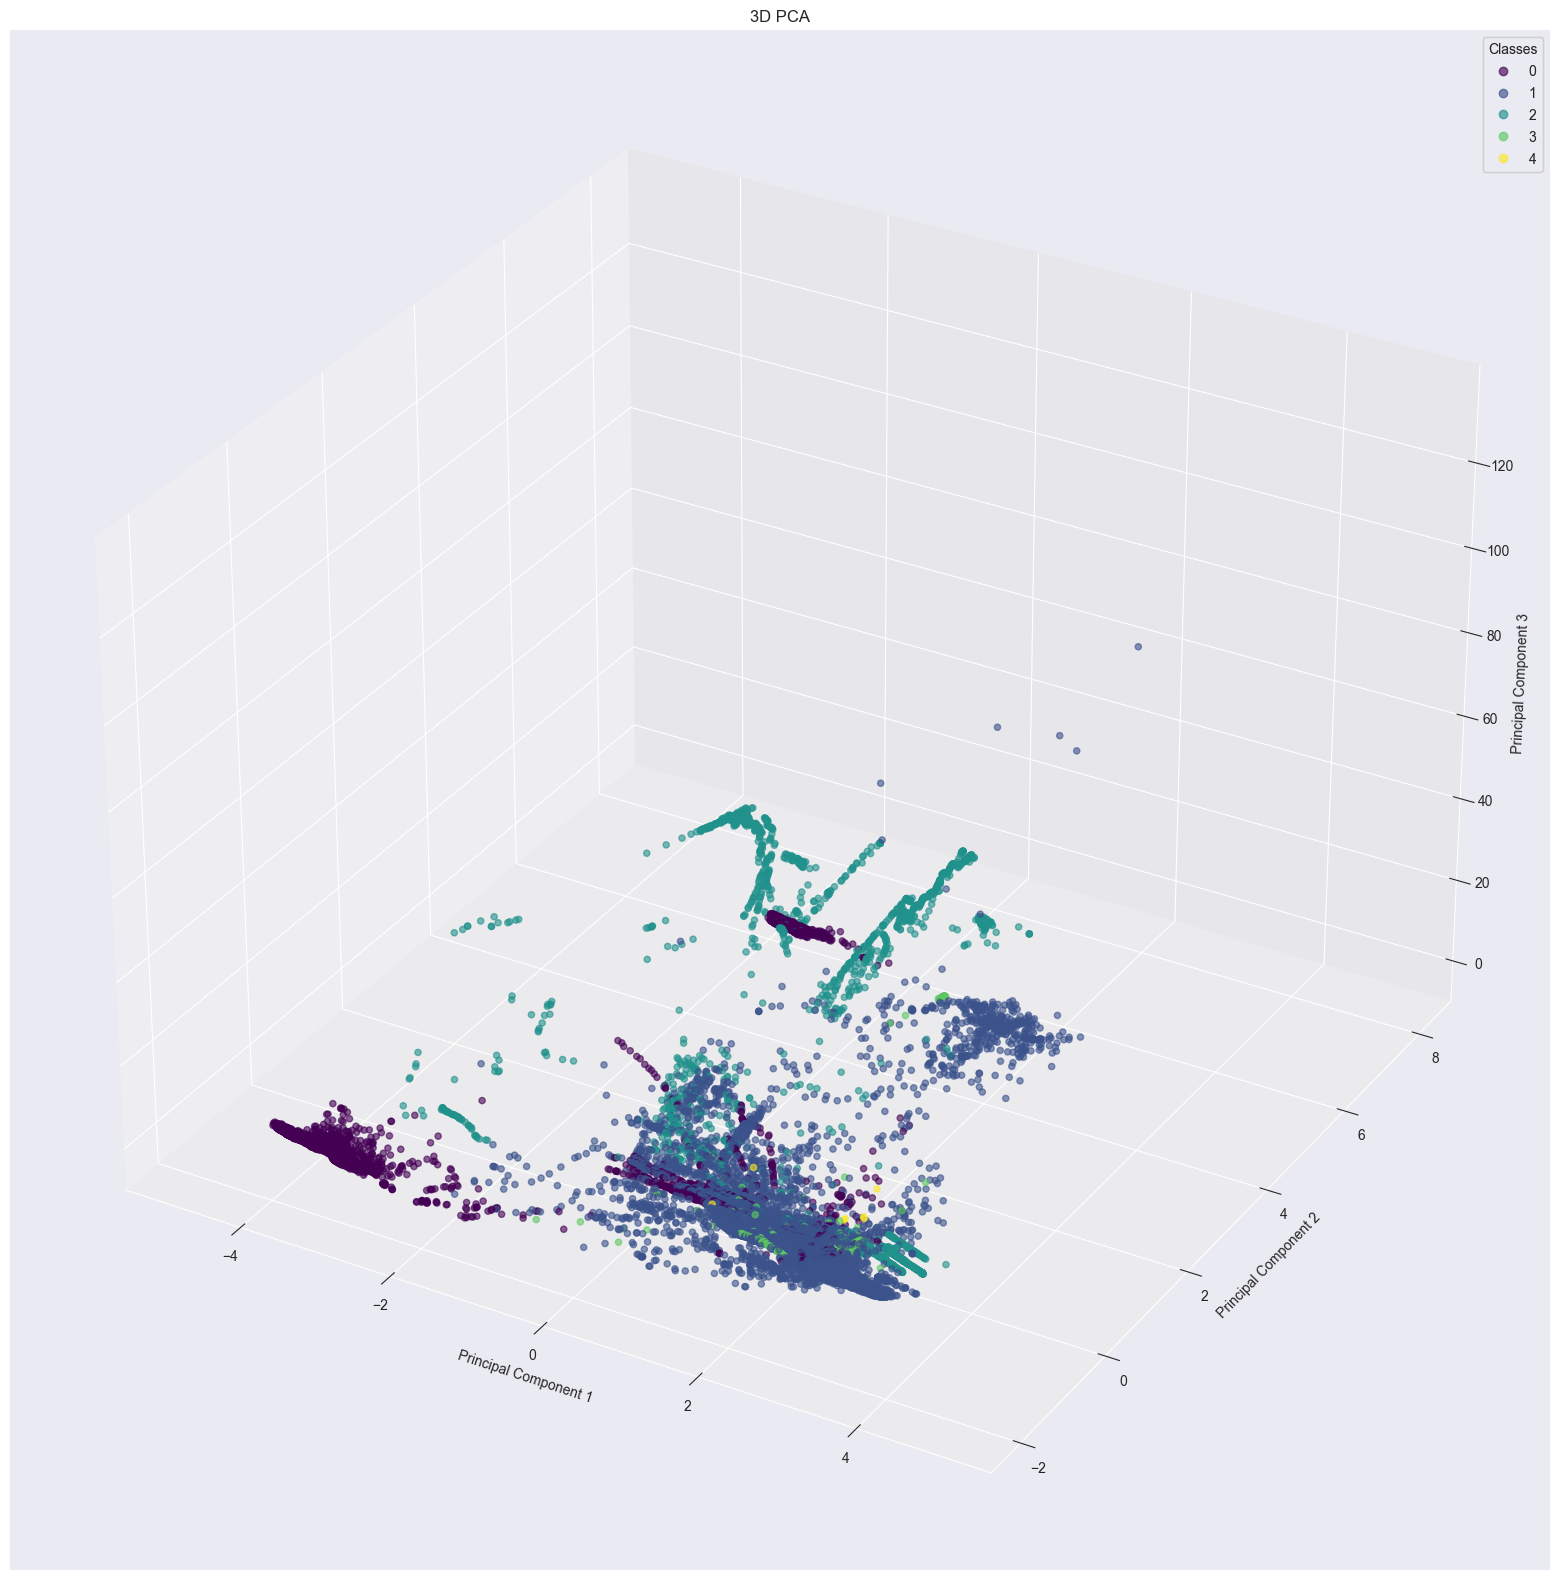

In [7]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Create a 3D scatter plot
fig = plt.figure(figsize=(25, 20))
ax = fig.add_subplot(111, projection='3d')

# Color map based on 'attack_class'
scatter = ax.scatter(pca_df['PC1'], pca_df['PC2'], pca_df['PC3'],
                     c=pca_df['attack_class'], cmap='viridis', alpha=0.6)

# Labels and title
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')
ax.set_title('3D PCA')

# Legend
legend = ax.legend(*scatter.legend_elements(), title="Classes")
ax.add_artist(legend)

# Show plot
plt.show()